In [1]:
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv',index_col=0)
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65494,France,Made from young vines from the Vaulorent porti...,Fourchaume Premier Cru,90,45.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,William Fèvre 2005 Fourchaume Premier Cru (Ch...,Chardonnay,William Fèvre
65495,Australia,"This is a big, fat, almost sweet-tasting Caber...",NaN,90,22.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Tapestry 2005 Cabernet Sauvignon (McLaren Vale),Cabernet Sauvignon,Tapestry
65496,US,"Much improved over the unripe 2005, Fritz's 20...",Estate,90,20.0,California,Dry Creek Valley,Sonoma,NaN,NaN,Fritz 2006 Estate Sauvignon Blanc (Dry Creek V...,Sauvignon Blanc,Fritz
65497,US,This wine wears its 15.8% alcohol better than ...,Block 24,90,31.0,California,Napa Valley,Napa,NaN,NaN,Hendry 2004 Block 24 Primitivo (Napa Valley),Primitivo,Hendry


## Plotting the number of NaN values in each feature (using bar plot)

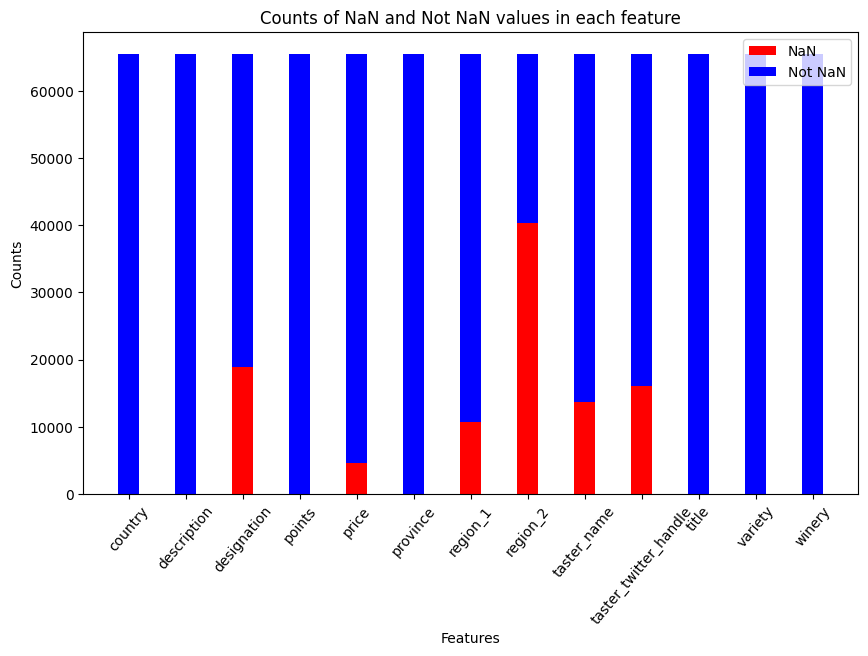

In [3]:
nan_counts = df.isna().sum()###
not_nan_counts = df.notna().sum() #plotting number of not NaN as weel (optional)

fig, ax = plt.subplots(figsize=(10,6))
index = df.columns
bar_width = 0.36
opacity = 1

bar1 = ax.bar(index, nan_counts, bar_width, alpha = opacity, color='r', label='NaN')
bar2 = ax.bar(index, not_nan_counts, bar_width, alpha=opacity, color='b', label='Not NaN', bottom=nan_counts)

ax.set_xlabel('Features')
ax.set_ylabel('Counts')
ax.set_title('Counts of NaN and Not NaN values in each feature')
ax.legend()

plt.xticks(rotation=50)
plt.tight_layout
plt.show()




## Removing the NaNs in all dataframe

In [4]:
#method 1
#new_df = df.dropna()
#new_df

#method 2
df_clean = df.fillna({'price': df['price'].mean()})
df_clean = df_clean.dropna(subset=['designation', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle'])
df_clean

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65471,US,This wine is spicy in forest floor and sage. S...,Dona Margarita Vineyard,88,58.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Alma Fria 2013 Dona Margarita Vineyard Pinot N...,Pinot Noir,Alma Fria
65472,US,"This is a bright fruit-driven wine, with clean...",Estate,88,19.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Apolloni 2015 Estate Chardonnay (Willamette Va...,Chardonnay,Apolloni
65473,US,"With a touch of reduction, this is a rustic, c...",Las Madres Vineyard Whole Cluster,88,39.0,California,Carneros,Napa-Sonoma,Virginie Boone,@vboone,Apsara 2014 Las Madres Vineyard Whole Cluster ...,Syrah,Apsara
65475,US,Faint cranberry and incense aromas show on the...,Sierra Mar Vineyard,88,55.0,California,Santa Lucia Highlands,Central Coast,Matt Kettmann,@mattkettmann,Bernardus 2014 Sierra Mar Vineyard Pinot Noir ...,Pinot Noir,Bernardus


## Creating two new columns in the dataframe and computing the standardization normalization of points and price features

In [5]:
norm_price = (df_clean["price"] - df_clean["price"].mean()) / df_clean["price"].std()
norm_points = (df_clean["points"] - df_clean["points"].mean()) / df_clean["points"].std()

df_clean["norm_price"] = norm_price
df_clean["norm_points"] = norm_points

df_clean


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,norm_price,norm_points
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.905434,-0.894896
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,-0.840927,-0.894896
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,-0.727034,-0.894896
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,1.057291,-0.894896
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,0.335968,-1.252416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65471,US,This wine is spicy in forest floor and sage. S...,Dona Margarita Vineyard,88,58.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Alma Fria 2013 Dona Margarita Vineyard Pinot N...,Pinot Noir,Alma Fria,0.639683,-0.537376
65472,US,"This is a bright fruit-driven wine, with clean...",Estate,88,19.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Apolloni 2015 Estate Chardonnay (Willamette Va...,Chardonnay,Apolloni,-0.840927,-0.537376
65473,US,"With a touch of reduction, this is a rustic, c...",Las Madres Vineyard Whole Cluster,88,39.0,California,Carneros,Napa-Sonoma,Virginie Boone,@vboone,Apsara 2014 Las Madres Vineyard Whole Cluster ...,Syrah,Apsara,-0.081640,-0.537376
65475,US,Faint cranberry and incense aromas show on the...,Sierra Mar Vineyard,88,55.0,California,Santa Lucia Highlands,Central Coast,Matt Kettmann,@mattkettmann,Bernardus 2014 Sierra Mar Vineyard Pinot Noir ...,Pinot Noir,Bernardus,0.525790,-0.537376


## Finding all US entry of country column and setting them to America

In [6]:
def replace_US_America(text):
    return text.replace('US', 'America')

df_clean["country"] = df_clean["country"].apply(replace_US_America)
df_clean

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,norm_price,norm_points
4,America,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.905434,-0.894896
10,America,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,-0.840927,-0.894896
23,America,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,-0.727034,-0.894896
25,America,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,1.057291,-0.894896
35,America,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,0.335968,-1.252416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65471,America,This wine is spicy in forest floor and sage. S...,Dona Margarita Vineyard,88,58.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Alma Fria 2013 Dona Margarita Vineyard Pinot N...,Pinot Noir,Alma Fria,0.639683,-0.537376
65472,America,"This is a bright fruit-driven wine, with clean...",Estate,88,19.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Apolloni 2015 Estate Chardonnay (Willamette Va...,Chardonnay,Apolloni,-0.840927,-0.537376
65473,America,"With a touch of reduction, this is a rustic, c...",Las Madres Vineyard Whole Cluster,88,39.0,California,Carneros,Napa-Sonoma,Virginie Boone,@vboone,Apsara 2014 Las Madres Vineyard Whole Cluster ...,Syrah,Apsara,-0.081640,-0.537376
65475,America,Faint cranberry and incense aromas show on the...,Sierra Mar Vineyard,88,55.0,California,Santa Lucia Highlands,Central Coast,Matt Kettmann,@mattkettmann,Bernardus 2014 Sierra Mar Vineyard Pinot Noir ...,Pinot Noir,Bernardus,0.525790,-0.537376


In [11]:
#In this case parametric tests may not be appropriate, hence using non-parametric tests might be a good choice
#Non-parametric test : the mann-whitney u test

from scipy.stats import mannwhitneyu

data = df_clean.loc[:,["points", "price"]]
stat, p = mannwhitneyu(data.loc[:,"points"], data.loc[:,"price"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=118151077.500, p=0.000
Different distribution (reject H0)


In [8]:
#if the data is indeed parametric, here is the code for it: (using ttest)
from scipy.stats import ttest_ind

stat, p = ttest_ind(data.loc[:,"points"], data.loc[:,"price"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
   print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=192.233, p=0.000
Different distributions (reject H0)


## What is the correlation between the price and points?

In [9]:
#Spearman correlation for non-parametric data
from scipy.stats import spearmanr

corr, p = spearmanr(data.loc[:,"points"], data.loc[:,"price"])

print('Pearsons correlation coef: %.3f' % corr)
print('Pearsons correlation p-val: %.3f' % p)

Pearsons correlation coef: 0.520
Pearsons correlation p-val: 0.000


In [10]:
#if the data is indeed parametric, here is the code for it: (using Pearson's r)
from scipy.stats import pearsonr

corr, p = pearsonr(data.loc[:,"points"], data.loc[:,"price"])

print('Pearsons correlation coef: %.3f' % corr)
print('Pearsons correlation p-val: %.3f' % p)

Pearsons correlation coef: 0.430
Pearsons correlation p-val: 0.000
